In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [4]:
!gdown 1l8Y3L29fO3z8y0NyJ92jA0J2Kp9e_bwY
data = pd.read_csv('Perovskite_Stability_with_features.csv')
data.head()


Downloading...
From: https://drive.google.com/uc?id=1l8Y3L29fO3z8y0NyJ92jA0J2Kp9e_bwY
To: /content/Perovskite_Stability_with_features.csv
100% 867k/867k [00:00<00:00, 11.0MB/s]


,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1


In [5]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data.columns = [c.replace('#', '') for c in data.columns]
data.columns = [c.replace('.', '') for c in data.columns]

In [6]:
data = data.drop(['X_site', 'B_site_3', 'A_site_3', 'A_site_2', 'B_site_2',
                   'Asite_IsBoron_weighted_avg', 'Asite_IsHalogen_weighted_avg',
                   'host_Asite0_IsCubic', 'Asite_IsPnictide_weighted_avg',
                   'host_Asite0_IsAlkali', 'host_Asite0_NsValence',
                   'host_Bsite0_IsNoblegas', 'Bsite_IsMetal_max',
                   'Asite_GSmagmom_min'], axis=1)


In [7]:
y = data.iloc[:, data.columns == 'energy_above_hull_(meV/atom)'].values
X = data.drop("energy_above_hull_(meV/atom)", axis=1)


In [8]:
cols = ['Material_Composition', 'A_site_1', 'B_site_1']
X[cols] = X[cols].apply(lambda x: pd.factorize(x)[0] + 1)

# Train-test split
test_size = 0.2
X1, X_test, y1, y_test = train_test_split(X, y, test_size=test_size, random_state=4)

In [9]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
X_test_scaled = scaler.transform(X_test)
X_scaled_df = pd.DataFrame(X_scaled, columns=X1.columns)


In [10]:
# First we will define function to make plots. This will make the code simpler.

def polt_parity(y_cv_test,y_pred_test, y_cv_train=None,y_pred_train=None, label=None, ylim=[50,900]):
    """
    Function to make parity plots.
    """

    # Plot Parity plot
    rmse_test = np.sqrt(mean_squared_error(y_cv_test,y_pred_test))
    r2_test = r2_score(y_cv_test,y_pred_test)

    if y_cv_train is None:
        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4), sharey=True, sharex=True)
    else:
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)

    ax1.scatter(y_cv_test,y_pred_test)
    ax1.text(0.95, 0.26, label, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.18, "RMSE: %.2f"%rmse_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R$^2$: %.2f"%r2_test, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.plot(ylim, ylim, '--k')
    ax1.set_xlabel('True y', fontsize=14)
    ax1.set_ylabel('Pred y', fontsize=14)
    ax1.set_xlim(ylim[0],ylim[1])
    ax1.set_ylim(ylim[0],ylim[1])

    if y_cv_train is not None:
        rmse_train = np.sqrt(mean_squared_error(y_cv_train,y_pred_train))
        r2_train = r2_score(y_cv_train,y_pred_train)

        ax2.scatter(y_cv_train,y_pred_train, c='m')
        ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.text(0.95, 0.18, "RMSE: %.2f"%rmse_train, transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)
        ax2.plot(ylim, ylim, '--k')

        ax2.set_xlabel('True y', fontsize=14)
        ax2.set_xlim(ylim[0],ylim[1])
        ax2.set_ylim(ylim[0],ylim[1])

    plt.tight_layout()
    plt.show()

    return None

In [11]:
lr = LinearRegression(fit_intercept=False)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

In [23]:
from sklearn.linear_model import Ridge

pr_l2 = Ridge(alpha=1)

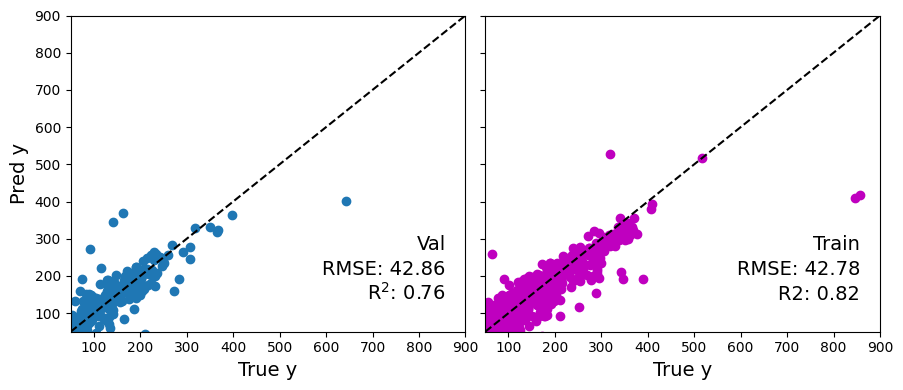

Root mean squared error: 42.86
Coefficient of determination: 0.76


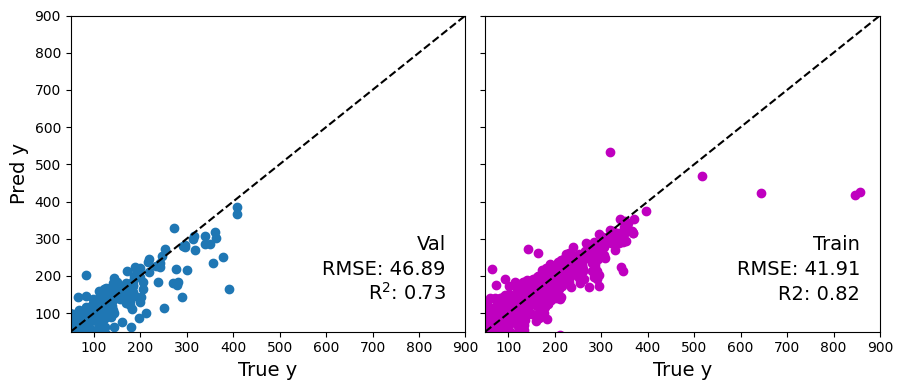

Root mean squared error: 46.89
Coefficient of determination: 0.73


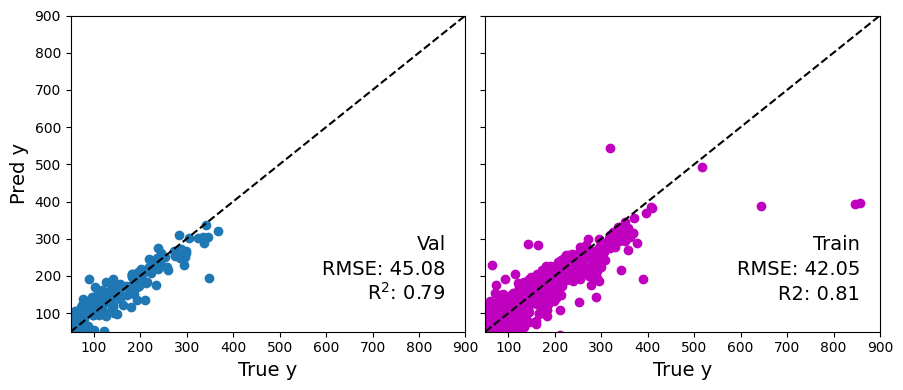

Root mean squared error: 45.08
Coefficient of determination: 0.79


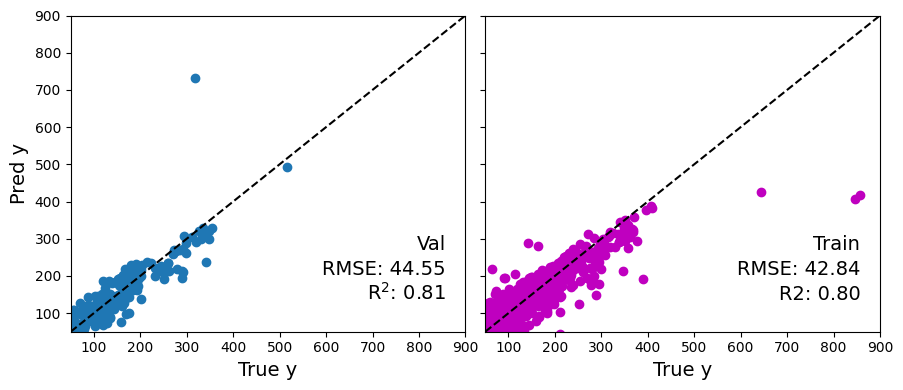

Root mean squared error: 44.55
Coefficient of determination: 0.81


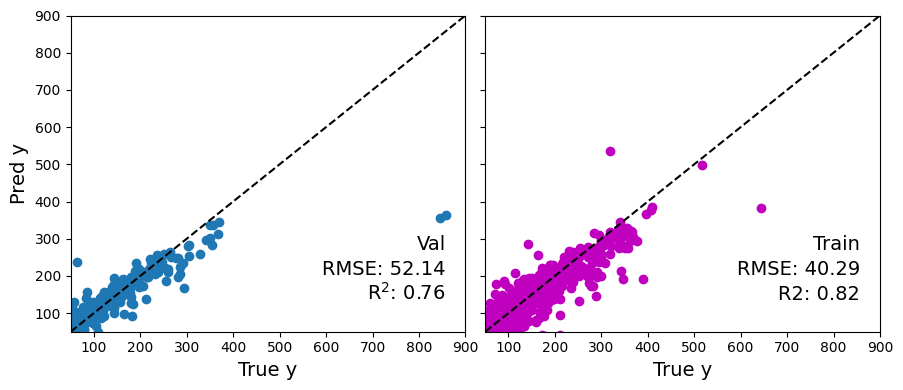

Root mean squared error: 52.14
Coefficient of determination: 0.76


In [24]:
errors_pr_l2 = []

for idx, (train, val) in enumerate(kf.split(X_scaled_df)):
    X_cv_train = X_scaled_df.iloc[train]
    X_cv_val = X_scaled_df.iloc[val]

    y_cv_train = y1[train]
    y_cv_val = y1[val]

    # Model fit and prediction
    model = pr_l2.fit(X_cv_train, y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)

    # Computing errors
    rmse_val = np.sqrt(mean_squared_error(y_cv_val, y_pred_val))
    rmse_train = np.sqrt(mean_squared_error(y_cv_train, y_pred_train))

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)

    # Plot Parity plot
    polt_parity(y_cv_val, y_pred_val, y_cv_train, y_pred_train, label="Val")

    print("Root mean squared error: %.2f" % rmse_val)
    print("Coefficient of determination: %.2f" % r2_val)

    error = {'kfold': idx+1,
             'rmse_train': rmse_train,
             'rmse_val': rmse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors_pr_l2.append(error)
errors_pr_l2 = pd.DataFrame(errors_pr_l2)


In [25]:
y_pred_test = model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.8095662829670576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
